# GBDT梯度提升树

使用的弱学习器是决策树,这意味着每个新加入到模型都是一个决策树,他们依次的被训练以纠正前一个模型的残差或者误差

## 梯度提升树都算法原理

- 损失函数$L(X,y)$: 用以衡量模型预测结果与真实结果都差异
- 弱评估器$f(x)$: 一遍为决策树,不同的Boosting算法使用不同的建树过程
- 综合集成结果$H(x)$: 既集成算法具体如何输出集成结果

In [4]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor

class GradientBoostingClassifier(sklearn.base.ClassifierMixin, BaseGradientBoosting)
 |  GradientBoostingClassifier(*, loss='log_loss', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
    
    class GradientBoostingRegressor(sklearn.base.RegressorMixin, BaseGradientBoosting)
 |  GradientBoostingRegressor(*, loss='squared_error', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

In [7]:
import matplotx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use(matplotx.styles.pitaya_smoothie['light'])
plt.rcParams['font.sans-serif'] = 'Times New Roman'
plt.rcParams['font.size'] = 16

from sklearn.ensemble import GradientBoostingClassifier as GBC  # 梯度提升分类树模型
from sklearn.ensemble import GradientBoostingRegressor  as GBR  # 梯度提升回归树模型

from sklearn.ensemble import AdaBoostRegressor as ABR # Adaboost回归树模型
from sklearn.ensemble import RandomForestRegressor as RFR  # 随机森林回归

from sklearn.model_selection import cross_validate, KFold # 交叉验证工具和K折划分工具

In [10]:
data = pd.read_csv('./data/train_encode.csv',index_col=0)
data.head()

,Id,住宅类型,住宅区域,街道接触面积(英尺),住宅面积,街道路面状况,巷子路面状况,住宅形状(大概),住宅现状,水电气,...,泳池面积,泳池质量,篱笆质量,其他配置,其他配置的价值,销售月份,销售年份,销售类型,销售状态,SalePrice
0,0.0,5.0,3.0,36.0,327.0,1.0,0.0,3.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,2.0,8.0,4.0,208500
1,1.0,0.0,3.0,51.0,498.0,1.0,0.0,3.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,1.0,8.0,4.0,181500
2,2.0,5.0,3.0,39.0,702.0,1.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,8.0,2.0,8.0,4.0,223500
3,3.0,6.0,3.0,31.0,489.0,1.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,8.0,0.0,140000
4,4.0,5.0,3.0,55.0,925.0,1.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,2.0,8.0,4.0,250000


In [11]:
X = data.iloc[:,:-1] # 训练样本
y = data.iloc[:,-1] # 训练样本的标签
y.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [12]:
# 定义一个交叉验证方式,这里使用的是5折交叉验证,打乱数据
cv = KFold(n_splits=5, shuffle=True, random_state=1210)

# 定义一个计算绝对平均的RMSE

def RMSE(result, name):
    return abs(result[name].mean())

In [29]:
gbr = GBR(random_state=1210)

# 使用从ross_validate对模型进行评估
result_gbdt = cross_validate(gbr,  # 传递给模型的对象
               X,   # 特征变量的数据集
               y,    #  目标变量的数据集
               cv=cv,  # 交叉验证的分割厕所
               scoring='neg_root_mean_squared_error', # 负的均方根误差
               return_train_score=True, # 是否在叫超验证当中返回训练分数
               verbose=True, #控制输出的冗余程度
               n_jobs=-1, # 并行作业的数量
              )

# 计算误差
train_rmse = RMSE(result_gbdt, "train_score")
test_rmse = RMSE(result_gbdt, 'test_score')
print(f'训练集得分: {train_rmse}')
print(f"测试集得分: {test_rmse}")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.5s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.5s finished


训练集得分: 14073.455827917089

测试集得分: 26931.362456023093

### 梯度提升回归树

In [19]:
import time

modelname = ['GBDT', 'RF', "AdaBoost", 'RF-TPE', 'Ada-TPE']
models = [
    GBR(random_state=1210), # 梯度提升回归树
    RFR(random_state=1210, n_jobs=-1), # 随机森林回归
    ABR(random_state=1210), # Adaboost模型
    RFR(n_estimators=89, max_depth=22, max_features=14, min_impurity_decrease=0,
       random_state=1210, verbose=False,n_jobs=-1), #  具有特定参数的随机森林模型,
    ABR(n_estimators=39, learning_rate=0.94,loss='exponential', 
        random_state=1210) # 具有特定参数的Adaboost模型
]
colors = ['green','red','orange','blue','black']

In [27]:
from rich import print
for name, model in zip(modelname, models):
    start_time = time.time() # 记录开始时间
    result = cross_validate(model,X, y, cv=cv,
            scoring="neg_root_mean_squared_error",
            return_train_score=True,verbose=False,n_jobs=-1
                           )
    elapsed_time = time.time() - start_time # 现在时间减去-开始用时
    print(f"模型名称: {name}, 训练集分数: {round(RMSE(result, 'train_score'),2)},\
测试集分数: {round(RMSE(result, 'test_score'),2)}, 花费时间为: {elapsed_time:.2f}")

模型名称: GBDT, 训练集分数: 14073.46,测试集分数: 26931.36, 花费时间为: 0.59

模型名称: RF, 训练集分数: 11342.86,测试集分数: 29394.77, 花费时间为: 0.90

模型名称: AdaBoost, 训练集分数: 27340.29,测试集分数: 34696.19, 花费时间为: 0.27

模型名称: RF-TPE, 训练集分数: 11058.27,测试集分数: 29036.76, 花费时间为: 0.29

模型名称: Ada-TPE, 训练集分数: 26830.72,测试集分数: 34441.29, 花费时间为: 0.24

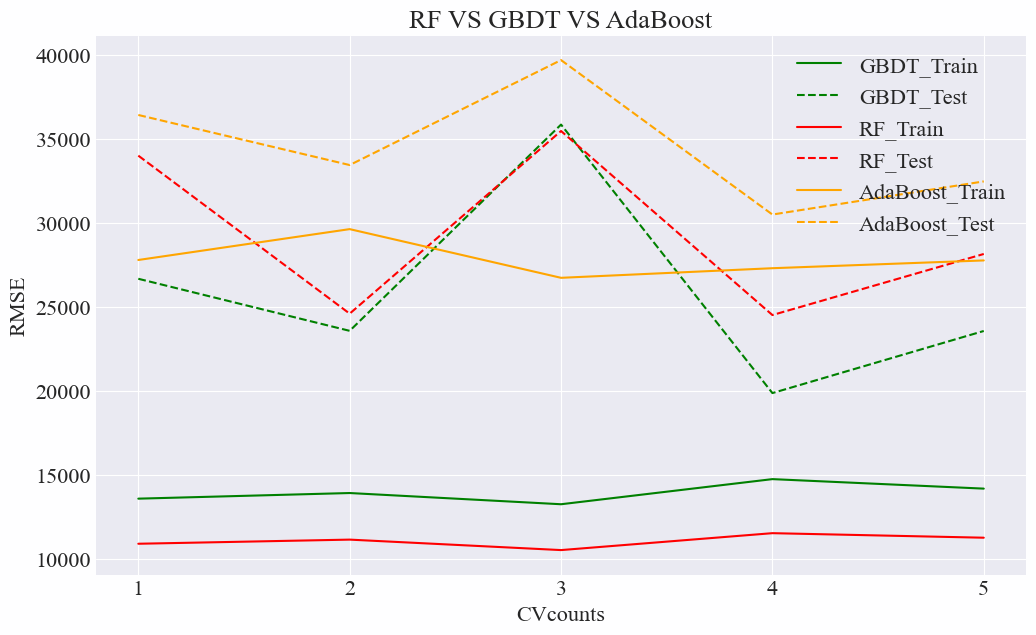

In [42]:

modelname = ['GBDT', 'RF', "AdaBoost", 'RF-TPE', 'Ada-TPE']
models = [
    GBR(random_state=1210), # 梯度提升回归树
    RFR(random_state=1210, n_jobs=-1), # 随机森林回归
    ABR(random_state=1210), # Adaboost模型
    RFR(n_estimators=89, max_depth=22, max_features=14, min_impurity_decrease=0,
       random_state=1210, verbose=False,n_jobs=-1), #  具有特定参数的随机森林模型,
    ABR(n_estimators=39, learning_rate=0.94,loss='exponential', 
        random_state=1210) # 具有特定参数的Adaboost模型
]
colors = ['green','red','orange','blue','black']
plt.figure(figsize=(12,7),dpi=100)
for name,model,color in zip(modelname[:3],models[:3],colors[:3]):
    result = cross_validate(model,X,y,cv=cv,scoring='neg_root_mean_squared_error',
                           return_train_score=True,verbose=False,n_jobs=-1
                           )
    plt.plot(range(1,6),abs(result['train_score']),color=color,label=f"{name}_Train")
    plt.plot(range(1,6),abs(result['test_score']),color=color,label=f"{name}_Test",linestyle='--')
plt.xticks([1,2,3,4,5])
plt.xlabel("CVcounts")
plt.ylabel('RMSE')
plt.title('RF VS GBDT VS AdaBoost')
plt.legend()
plt.show()

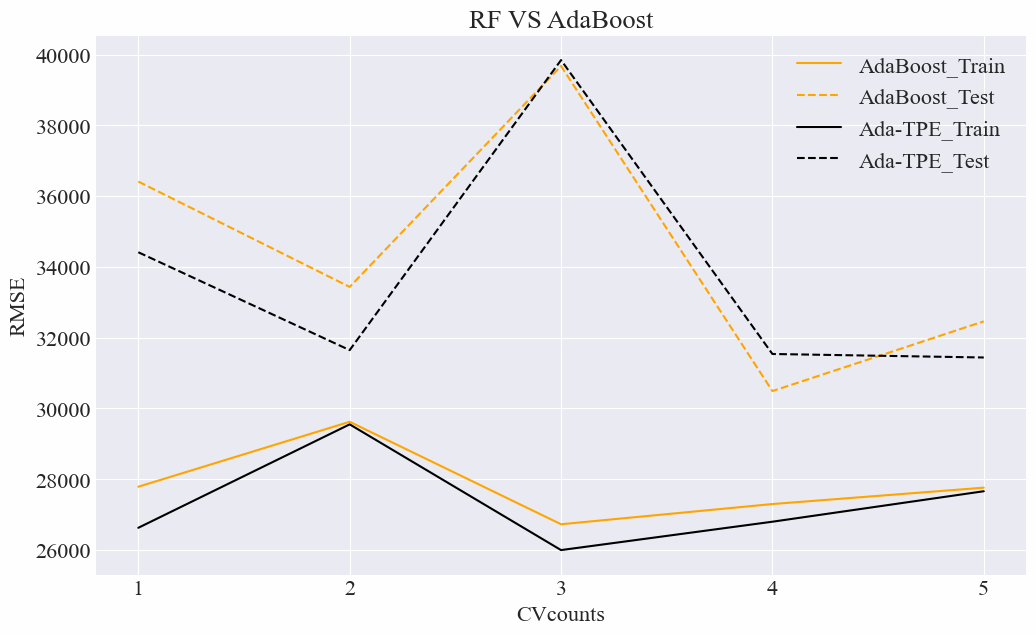

In [43]:
colors = ['green','red','orange','blue','black']
plt.figure(figsize=(12,7),dpi=100)
for name,model,color in zip(modelname[2:5:2],models[2:5:2],colors[2:5:2]):
    result = cross_validate(model,X,y,cv=cv,scoring='neg_root_mean_squared_error',
                           return_train_score=True,verbose=False,n_jobs=-1
                           )
    plt.plot(range(1,6),abs(result['train_score']),color=color,label=f"{name}_Train")
    plt.plot(range(1,6),abs(result['test_score']),color=color,label=f"{name}_Test",linestyle='--')
plt.xticks([1,2,3,4,5])
plt.xlabel("CVcounts")
plt.ylabel('RMSE')
plt.title('RF VS AdaBoost')
plt.legend()
plt.show()

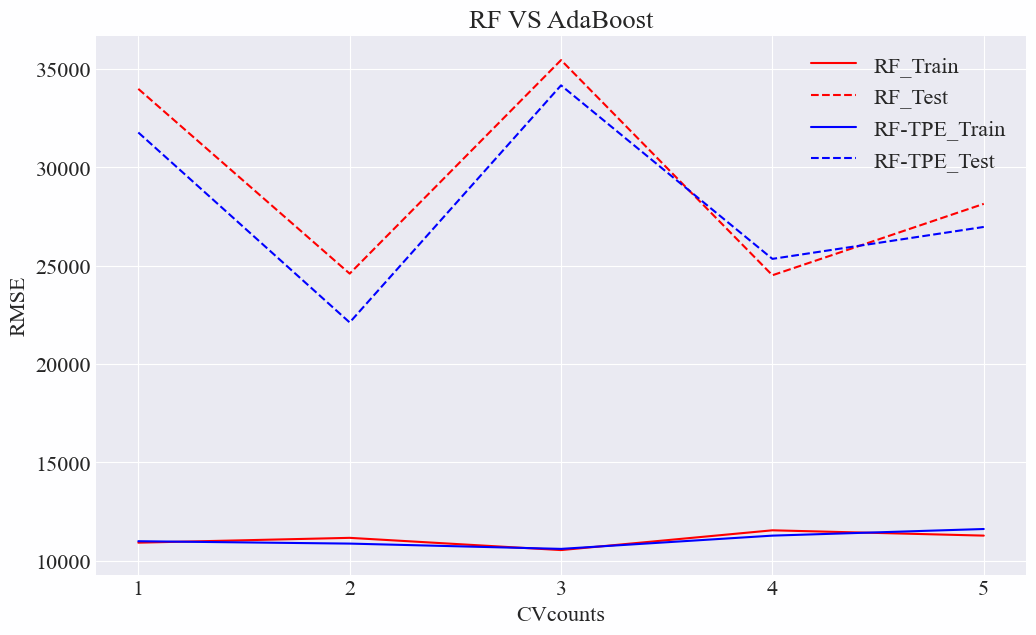

In [44]:
colors = ['green','red','orange','blue','black']
plt.figure(figsize=(12,7),dpi=100)
for name,model,color in zip(modelname[1:5:2],models[1:5:2],colors[1:5:2]):
    result = cross_validate(model,X,y,cv=cv,scoring='neg_root_mean_squared_error',
                           return_train_score=True,verbose=False,n_jobs=-1
                           )
    plt.plot(range(1,6),abs(result['train_score']),color=color,label=f"{name}_Train")
    plt.plot(range(1,6),abs(result['test_score']),color=color,label=f"{name}_Test",linestyle='--')
plt.xticks([1,2,3,4,5])
plt.xlabel("CVcounts")
plt.ylabel('RMSE')
plt.title('RF VS AdaBoost')
plt.legend()
plt.show()

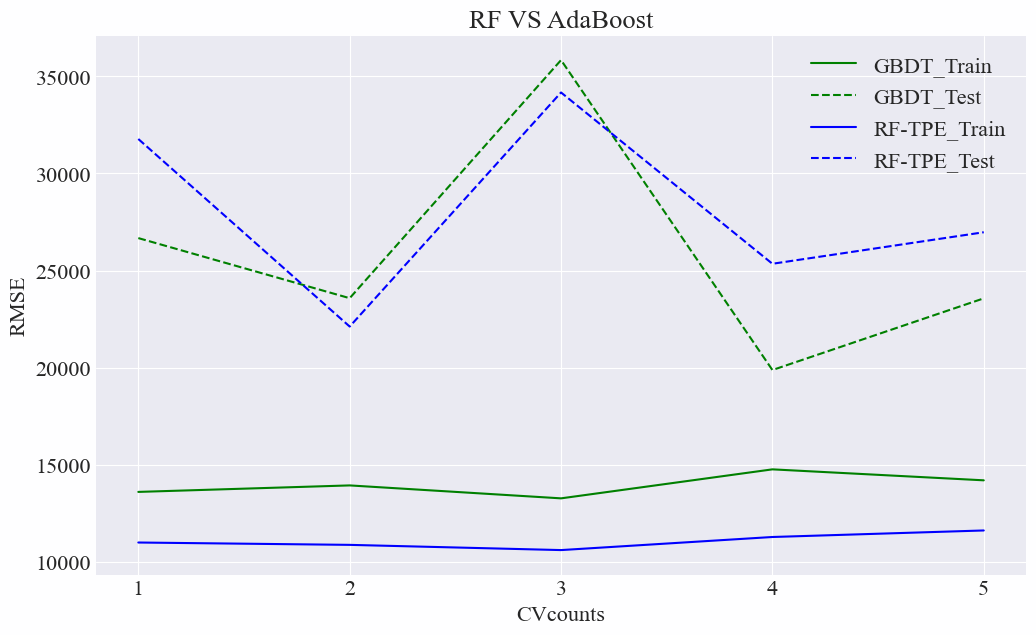

In [45]:
colors = ['green','red','orange','blue','black']
plt.figure(figsize=(12,7),dpi=100)
for name,model,color in zip(modelname[:5:3],models[:5:3],colors[:5:3]):
    result = cross_validate(model,X,y,cv=cv,scoring='neg_root_mean_squared_error',
                           return_train_score=True,verbose=False,n_jobs=-1
                           )
    plt.plot(range(1,6),abs(result['train_score']),color=color,label=f"{name}_Train")
    plt.plot(range(1,6),abs(result['test_score']),color=color,label=f"{name}_Test",linestyle='--')
plt.xticks([1,2,3,4,5])
plt.xlabel("CVcounts")
plt.ylabel('RMSE')
plt.title('RF VS AdaBoost')
plt.legend()
plt.show()

### 梯度提升分类树

In [51]:
from sklearn.ensemble import GradientBoostingClassifier as GBC
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.model_selection import train_test_split
import seaborn as sns

In [49]:
data.columns
data['销售状态'].unique()

array([4., 0., 5., 1., 2., 3.])

In [69]:
y = data.iloc[:,-2]
X = data.drop('SalePrice',axis=1)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
            test_size=0.2, random_state=1210, stratify=y)

In [71]:
gbc_clf = GBC(random_state=1210)

cv = KFold(n_splits=5, shuffle=True, random_state=1210)

result_clf = cross_validate(gbc_clf, X_train, y_train, cv=cv, scoring='f1_macro',n_jobs=-1)

print(f"交叉验证后 得分为: {result_clf['test_score'].mean():.3f}")

交叉验证后 得分为: 0.848

In [72]:
gbc_clf.fit(X_train,y_train)

y_pred = gbc_clf.predict(X_test)

In [73]:
print(classification_report(y_test, y_pred))

precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        20
         1.0       1.00      1.00      1.00         1
         2.0       1.00      1.00      1.00         2
         3.0       1.00      1.00      1.00         4
         4.0       1.00      1.00      1.00       240
         5.0       1.00      1.00      1.00        25

    accuracy                           1.00       292
   macro avg       1.00      1.00      1.00       292
weighted avg       1.00      1.00      1.00       292

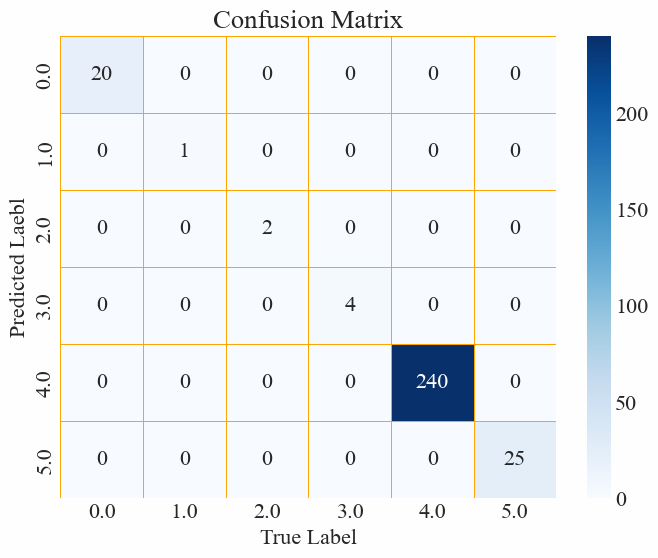

In [74]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6),dpi=100)
sns.heatmap(cm,annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test),
            edgecolor='orange',linewidths=.4,linecolor='orange',
           yticklabels=np.unique(y_test)
           )
plt.title('Confusion Matrix')
plt.xlabel('True Label')
plt.ylabel('Predicted Laebl')
plt.show()

In [77]:
x_predict = gbc_clf.predict(X_train)
print(classification_report(y_true=y_train, y_pred=x_predict))

precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        81
         1.0       1.00      1.00      1.00         3
         2.0       1.00      1.00      1.00        10
         3.0       1.00      1.00      1.00        16
         4.0       1.00      1.00      1.00       958
         5.0       1.00      1.00      1.00       100

    accuracy                           1.00      1168
   macro avg       1.00      1.00      1.00      1168
weighted avg       1.00      1.00      1.00      1168

任务: 使用随机森林回归,以及Adaboost回归,完成分类任务.

## GBDT梯度提升树调参

class GradientBoostingClassifier(sklearn.base.ClassifierMixin, BaseGradientBoosting)
 |  GradientBoostingClassifier(*, loss='log_loss', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
 
 class GradientBoostingRegressor(sklearn.base.RegressorMixin, BaseGradientBoosting)
 |  GradientBoostingRegressor(*, loss='squared_error', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

### 迭代过程中的参数

n_estimators: 弱评估器的参数
learning_rate: 学习率

学习率越低,那需要使用的评估器数量越多,学习率越高,要使用的评估器越少.

- init: 输入计算初始预测结果的估计器对象,默认是None,

In [91]:
from sklearn.tree import DecisionTreeRegressor as DTR
X = data.iloc[:,:-1] # 训练样本
y = data.iloc[:,-1] # 训练样本的标签
tree_reg = DTR(random_state=1210)  #  初始化一个回归树作为若学习器

# 初始化一个随机森林回归器
rfr = RFR(n_estimators=89, max_depth=22, max_features=14, min_impurity_decrease=0,
         random_state=1210, verbose=False,n_jobs=-1)
lists = [tree_reg, rfr, "zero", None]
for init in lists:
    reg = GBR(init=init,random_state=1210) # 梯度提升算法,采用不同初始化学习器.
    # 设置一个交叉分类验证器,做5折交叉验证,并打乱数据,设置随机数种子
    cv = KFold(n_splits=5, shuffle=True, random_state=1210)
    result_reg = cross_validate(
        reg,  # 初始化的梯度替身术模型
        X,   # 训练数据的特征
        y,  # 训练数据的标签
        cv=cv, # 做5折交叉验证
        scoring='neg_root_mean_squared_error', # 采用负的均方根误差,误差越小越好了.
        return_train_score=True, # 返回训练集上的得分
        n_jobs=-1, # 所有可用的CPU核心用来加速计算
                               )
    print(f"训练集训练样本的RMSE: {np.sqrt(-result_reg['train_score'].mean()):.3f}")
    print(f"测试集样本的RMSE: {np.sqrt(-result_reg['test_score'].mean()):.3f}")

训练集训练样本的RMSE: -0.000

测试集样本的RMSE: 204.092

训练集训练样本的RMSE: 74.364

测试集样本的RMSE: 165.914

训练集训练样本的RMSE: 118.632

测试集样本的RMSE: 165.416

训练集训练样本的RMSE: 118.632

测试集样本的RMSE: 164.108

初始化参数的具体输入,会对模型的最终结果产生巨大的影响,在初始化参数当中输入训练好的模型会加重GBDT的过拟合,但是同时能得到更好的测试结果,甚至可用将训练好的GDBT模型放入到初始化参数当中,嚷嚷这样的结果是过拟合被无限的放大甚至无法挽回.

In [93]:
reg = GBR(init=None,random_state=1210)
reg.fit(X,y)
reg.init_  # DummyRegressor(), 返回sklean当中默认的评估器

reg = GBR(init=rfr,random_state=1210)
reg.fit(X,y)
reg.init_  # DummyRegressor(), 返回sklean当中默认的评估器

RandomForestRegressor(max_depth=22, max_features=14, min_impurity_decrease=0,
                      n_estimators=89, n_jobs=-1, random_state=1210,
                      verbose=False)

### n_estimators with estimators_

n_estimators: 实际的迭代次数
estimators_: 实际建立若评估器的数量.

In [98]:
y_clf = data.iloc[:,-2]
X_clf = data.drop('SalePrice',axis=1)

In [99]:
from sklearn.ensemble import GradientBoostingClassifier as GBC

In [104]:
clf = GBC(n_estimators=10, random_state=1210) # 设置最大的迭代次数是10
clf.fit(X_clf,y_clf)

print(f"所有评估器的形状: {clf.estimators_.shape}") # 表示每次迭代建立了6个评估器,
print(f"实际的迭代器数量: {clf.n_estimators_}") # s实际的迭代器数量是10,
print(f"第一次迭代使用的评估器有: {clf.estimators_[0]}")
print(f"样本target的类别数量: {clf.n_classes_}")

所有评估器的形状: (10, 6)

实际的迭代器数量: 10

第一次迭代使用的评估器有: [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                       random_state=RandomState(MT19937) at 0x2447DF27840)
 DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                       random_state=RandomState(MT19937) at 0x2447DF27840)
 DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                       random_state=RandomState(MT19937) at 0x2447DF27840)
 DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                       random_state=RandomState(MT19937) at 0x2447DF27840)
 DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                       random_state=RandomState(MT19937) at 0x2447DF27840)
 DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
                       random_state=RandomState(MT19937) at 0x2447DF27840)]

样本target的类别数量: 6

在执行多分类任务时, 如果我们要求模型迭代10次,模型会按照多分类标签n_classes建立10*n_class个若评估器, 对于二分类任务,则不会出现这种情况.

### GBDT的损失函数-loss参数

- 分类器中的损失:
    - deviance: 偏差,特指逻辑回归的损失函数,交叉熵损失
    - exponential": 特指Adaboost当使用的指数损失函数.
- 回归器中的损失:
    - squared_error: 平方误差
    - absolute_error: 绝对误差
    - Huber损失: 此时需要调整alpha参数
    - quantile损失:  此时需要调整alpha参数
    
- 如选择这些损失
1. 当高度关注离群值,并且希望能将离群点准确预测的时候,我们可用选择平方误差.
2. 如果我们希努力排除离群点的影响,更关注哪些非离群点的样本时,可用选择绝对误差,
3. 试图平衡离群值和非离群值时,可以选择Huber损失,quantile损失: 

### 弱评估器的结构-如何帮助梯度提升树实现提前 停止

1. 当GDBT已经达到了足够好的效果,非常接近收敛状态,持续迭代不会有助于提升算法的表现.
2. GDBT还没有达到足够好点效果,但是迭代过程当中出现越迭代效果越差的情况.
3. GDBT还没有达到足够好的效果,但是训练时间太长了,速度太慢,这时候得让他停下来,然后再训练

早停策略的参数:
   
1. validation_fraction: 从训练集中提取出用于提前提前停止的验证数据占比,0-1之间
2. n_iter_no_change: 当验证集上的损失函数连续n_iter_no_change次都没有下降或者下降达不到阈值的时候,触发停止
3. tol: 损失函数的下降阈值, 默认1e * 4, 也可以调整为其他浮点数来进行观察.

In [106]:
from sklearn.ensemble import GradientBoostingRegressor as GBR

In [111]:
gbr1 = GBR(
    n_estimators=100, # 最大的迭代次数为100,
    validation_fraction=0.1, # 使用10%的数据作为验证集
    n_iter_no_change=3, # 如果连续三次迭代没有改进,则提前停止
    tol=0.01, # 容忍度,当损失函数的变化小于这个值时认为没有改进 .
    random_state=1210,
)
gbr1.fit(X,y)

GradientBoostingRegressor(n_iter_no_change=3, random_state=1210, tol=0.01)

In [112]:
gbr2 = GBR(
    n_estimators=100, # 最大迭代100次
    random_state=1210,
)
gbr2.fit(X, y)

GradientBoostingRegressor(random_state=1210)

In [113]:
print(f"加入早停机制的实际迭代次数为: {gbr1.n_estimators_}")
print(f"未加入早停机制的实际迭代次数为: {gbr2.n_estimators_}")

加入早停机制的实际迭代次数为: 83

未加入早停机制的实际迭代次数为: 100

### 提前停止 VS 不提前停止

In [114]:
import time

In [121]:
X = data.iloc[:,:-1] # 训练样本
y = data.iloc[:,-1] # 训练样本的标签
start_time = time.time()

gbr1 = GBR(
    n_estimators=1000, # 最大的迭代次数为100,
    validation_fraction=0.2, # 使用10%的数据作为验证集
    n_iter_no_change=10, # 如果连续三次迭代没有改进,则提前停止
    tol=0.001, # 容忍度,当损失函数的变化小于这个值时认为没有改进 .
    random_state=1210,
)
gbr1.fit(X,y)
print(f"使用早停策略所花费的时间为: {time.time() - start_time:.2f}秒, 一共迭代了: {gbr1.n_estimators_}次")

使用早停策略所花费的时间为: 0.85秒, 一共迭代了: 160次

In [122]:
start_time = time.time()

gbr2 = GBR(
    n_estimators=1000, # 最大的迭代次数为100,
    random_state=1210,
)
gbr2.fit(X,y)
print(f"未使用早停策略所花费的时间为: {time.time()-start_time:.2f}秒,一共迭代了: {gbr2.n_estimators_}次")

未使用早停策略所花费的时间为: 6.26秒,一共迭代了: 1000次

In [123]:
print(f"有早停测试数据上的R^2: {gbr1.score(X,y)}")
print(f"没有早停测试数据上的R^2: {gbr2.score(X,y)}")

有早停测试数据上的R^2: 0.9693820108229507

没有早停测试数据上的R^2: 0.9981679504031234

### 梯度提升树的袋外数据

In [124]:
reg = GBR(
    n_estimators=500,
    learning_rate=0.1,
    subsample=0.3, #每次建树只抽取30%的数据进行训练
    random_state=1210,
)
reg.fit(X,y)

GradientBoostingRegressor(n_estimators=500, random_state=1210, subsample=0.3)

In [126]:
print(f"袋外数据损失函数变化量的形状, {reg.oob_improvement_.shape}")
print(f"训练集数据损失函数变化量的形状, {reg.train_score_.shape}")

袋外数据损失函数变化量的形状, (500,)

训练集数据损失函数变化量的形状, (500,)

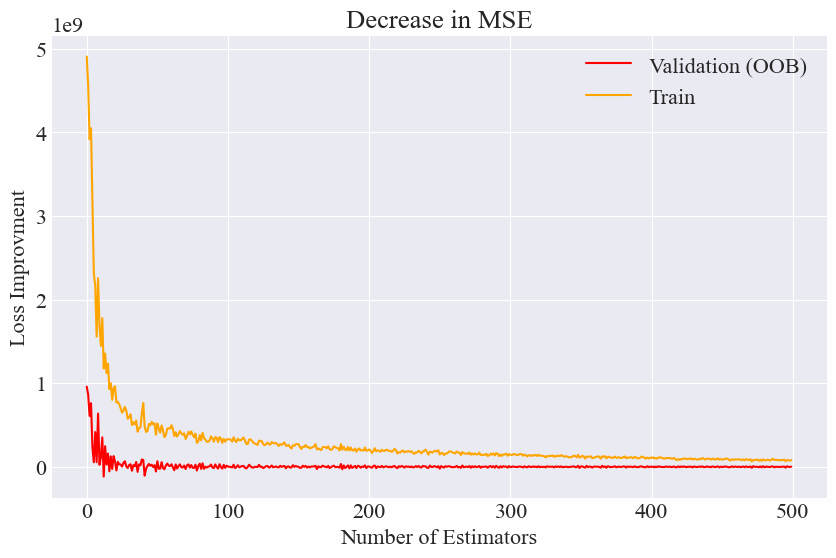

In [129]:
plt.figure(figsize=(10, 6), dpi=100)
plt.plot(range(500), reg.oob_improvement_,color='red', label='Validation (OOB)')
plt.plot(range(500), reg.train_score_,color='orange',label = 'Train')

plt.title('Decrease in MSE')
plt.xlabel('Number of Estimators')
plt.ylabel('Loss Improvment')
plt.legend()
plt.show()

In [133]:
reg1 = GBR(
     n_estimators=500,
    learning_rate=0.1,
    tol=1e-6, # 非常低非常低阈值
    validation_fraction=0.3,
    n_iter_no_change=5,
    subsample=0.3, #每次建树只抽取30%的数据进行训练
    random_state=1210,
)
reg1.fit(X,y)
print(reg1.oob_improvement_.shape)

(45,)

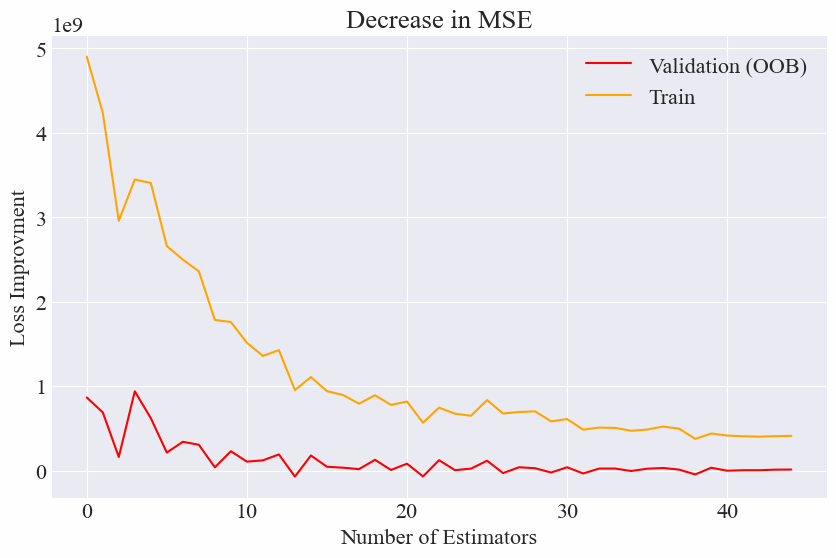

In [134]:
plt.figure(figsize=(10, 6), dpi=100)
plt.plot(range(45), reg1.oob_improvement_,color='red', label='Validation (OOB)')
plt.plot(range(45), reg1.train_score_,color='orange',label = 'Train')

plt.title('Decrease in MSE')
plt.xlabel('Number of Estimators')
plt.ylabel('Loss Improvment')
plt.legend()
plt.show()